# NAIVE BAYES CLASSIFIER

In [42]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import cross_val_score, train_test_split

In [13]:
# loading dataset
try:
    FraudTransactions=pd.read_csv('C:/Users\Raktim\Desktop\Python\PS_20174392719_1491204439457_log.csv')
except:
    print('Database not able to load')
df=FraudTransactions

In [15]:
df = df.loc[(df['type'].isin(['CASH_OUT', 'TRANSFER'])),:] #selecting rows with type 'CASH_OUT' and 'TRANSFER'
df.drop(df.columns[[0,3,6,10]], axis=1, inplace=True) #droupping columns
df.type=pd.factorize(df.type)[0] #factorizing the type column

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0,181.00,181.0,0.0,0.0,0.00,1
3,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,0,215310.30,705.0,0.0,22425.0,0.00,0
24,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [30]:
y=df.isFraud
df_train,df_test,y_train,y_test=train_test_split(df.drop(['isFraud'],axis=1), y, test_size=0.3, random_state=1)

In [31]:
gnb = GaussianNB()
gnb.fit(df_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(df_test)

In [32]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[817014  11628]
 [  1485    996]]


In [33]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    828642
          1       0.08      0.40      0.13      2481

avg / total       1.00      0.98      0.99    831123



In [34]:
y_score = gnb.predict_proba(df_test)[:,1]
y_score

array([2.46094364e-06, 1.26754865e-06, 1.69335171e-04, ...,
       1.00092893e-05, 1.94214334e-06, 2.43151286e-06])

In [35]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [36]:
roc_auc = auc(false_positive_rate, true_positive_rate)

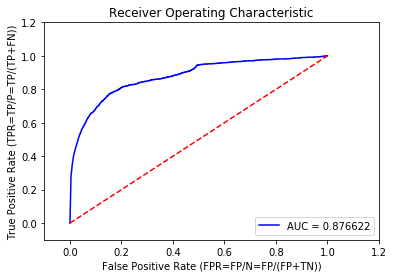

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [38]:
scores = cross_val_score(gnb,df, df.isFraud, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.97923055 0.98992748 0.98985529 0.96365874 0.98846378]


In [39]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9822271695857202
